# Imports

In [1]:
import torchrain as tr # import torchrain 
from matplotlib import pyplot as plt

/data/envs/thesis_base/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Load OpenCML Dataset

In [2]:
open_cml_dataset = tr.read_open_cml_dataset('../data/open_cml.p') #  read OpenCML dataset

# Select Link and Plot link data

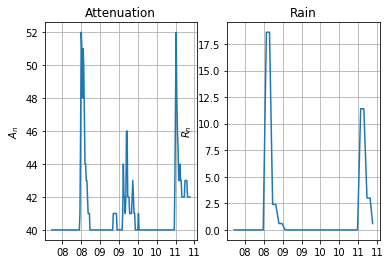

In [14]:
link_index = 14
link_data = open_cml_dataset[link_index] # select a link 
link_data.plot() # plot link data

# Run rain estimation using constant baseline
 

In [26]:
tsc = tr.rain_estimation.two_step_constant_baseline(tr.power_law.PowerLawType.ITU,0.1,5,1.1,wa_factor=2.6) # init classification model
rain,wd = tsc(link_data.attenuation(),link_data.meta_data) # run classification method

Python 3.6.7 | packaged by conda-forge | (default, Feb 28 2019, 09:07:38) 
Type 'copyright', 'credits' or 'license' for more information
IPython 7.5.0 -- An enhanced Interactive Python. Type '?' for help.
PyDev console: using IPython 7.5.0

Python 3.6.7 | packaged by conda-forge | (default, Feb 28 2019, 09:07:38) 
[GCC 7.3.0] on linux
ERROR! Session/line number was not unique in database. History logging moved to new session 903


tensor([[-2.6000, -2.6000, -2.6000, -2.6000, -2.6000, -2.6000, -2.6000, -2.6000,
         -2.6000, -2.6000, -2.6000, -2.6000, -2.6000, -2.6000, -2.6000, -2.6000,
         -2.6000, -2.6000, -2.6000, -2.6000, -2.6000, -2.6000, -2.6000, -2.6000,
         -2.6000, -2.6000, -2.6000, -2.6000, -2.6000, -2.6000, -2.6000, -2.6000,
         -2.6000, -2.6000, -2.6000, -2.6000, -2.6000, -2.6000, -2.6000, -2.6000,
         -2.6000, -2.6000, -2.6000, -2.6000, -2.6000, -1.6000,  3.4000,  9.4000,
          8.4000,  5.4000,  8.4000,  7.4000,  4.4000,  1.4000,  1.4000, -2.6000,
         -2.6000, -2.6000, -2.6000, -2.6000, -2.6000, -2.6000, -2.6000, -2.6000,
         -2.6000, -2.6000, -2.6000, -2.6000, -2.6000, -2.6000, -2.6000, -2.6000,
         -2.6000, -2.6000, -2.6000, -2.6000, -2.6000, -2.6000, -2.6000, -2.6000,
         -2.6000, -2.6000, -2.6000, -2.6000, -2.6000, -2.6000, -2.6000, -2.6000,
         -2.6000, -2.6000, -2.6000, -2.6000, -2.6000, -2.6000, -2.6000, -2.6000,
         -2.6000, -2.6000, -

KeyboardInterrupt: 

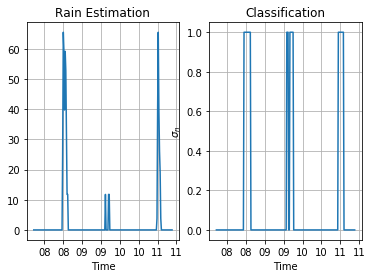

In [16]:
plt.subplot(1, 2, 1)
plt.plot(link_data.time(), rain.numpy()[0, :])
plt.title('Rain Estimation')
plt.xlabel('Time')
tr.change_x_axis_time_format('%H')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(link_data.time(), wd.numpy()[0, :])
plt.xlabel('Time')
plt.title('Classification')
tr.change_x_axis_time_format('%H')
plt.ylabel(r'$\sigma_n$')
plt.grid()
plt.show()

# References
[1] 
